In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.utils

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
# import tensorflow_probability as tfp
# import tensorflow_estimator

In [54]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [5]:
plt.rcParams['figure.dpi'] = 120

In [6]:
# Load data from https://www.openml.org/d/554
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X2 = X.copy()

In [7]:
X = X.reshape((70000, 28, 28))

In [8]:
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X[i], cmap=plt.cm.Greys)
plt.gcf().set_size_inches(10, 4)

In [9]:
X2.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
y=y.astype(np.int32)

In [12]:
dir(keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_deprecation_wrapper',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [13]:
m = keras.Sequential()
m.add(Dense(100, input_shape=(784,), activation='relu'))
m.add(Dense(100, activation='relu'))
m.add(Dropout(0.4))
m.add(Dense(100, activation='relu'))
m.add(Dropout(0.4))
m.add(Dense(100, activation='relu'))
m.add(Dense(10, activation='softmax'))
m.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

W0716 00:09:06.940547 139777917466432 deprecation.py:506] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
hist_ = m.fit(X2[:50000], 
      keras.utils.to_categorical(y[:50000]), verbose=1, shuffle=True,
      batch_size=500, epochs=60, workers=4, use_multiprocessing=True,
      validation_data=(X2[50000:], keras.utils.to_categorical(y[50000:])))

Train on 50000 samples, validate on 20000 samples
Epoch 1/60
50000/50000 [==============================] - 2s 49us/sample - loss: 5.1398 - acc: 0.2463 - val_loss: 1.5866 - val_acc: 0.4638
Epoch 2/60
50000/50000 [==============================] - 2s 42us/sample - loss: 1.5390 - acc: 0.4816 - val_loss: 1.2121 - val_acc: 0.5804
Epoch 3/60
50000/50000 [==============================] - 2s 41us/sample - loss: 1.1983 - acc: 0.5830 - val_loss: 0.9072 - val_acc: 0.6888
Epoch 4/60
50000/50000 [==============================] - 2s 42us/sample - loss: 0.9215 - acc: 0.6984 - val_loss: 0.7079 - val_acc: 0.7523
Epoch 5/60
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7290 - acc: 0.7757 - val_loss: 0.5818 - val_acc: 0.8430
Epoch 6/60
50000/50000 [==============================] - 2s 41us/sample - loss: 0.6071 - acc: 0.8247 - val_loss: 0.4887 - val_acc: 0.8575
Epoch 7/60
50000/50000 [==============================] - 2s 41us/sample - loss: 0.5098 - acc: 0.8594 - val_loss: 0.

In [15]:
np.argmax(m.predict(X2[50000:50020]), axis=1).reshape((2, 10))

array([[3, 8, 6, 9, 6, 4, 5, 3, 8, 4],
       [5, 2, 3, 8, 4, 8, 1, 5, 0, 5]])

In [16]:
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X[50000+i], cmap=plt.cm.Greys)
plt.gcf().set_size_inches(10, 4)

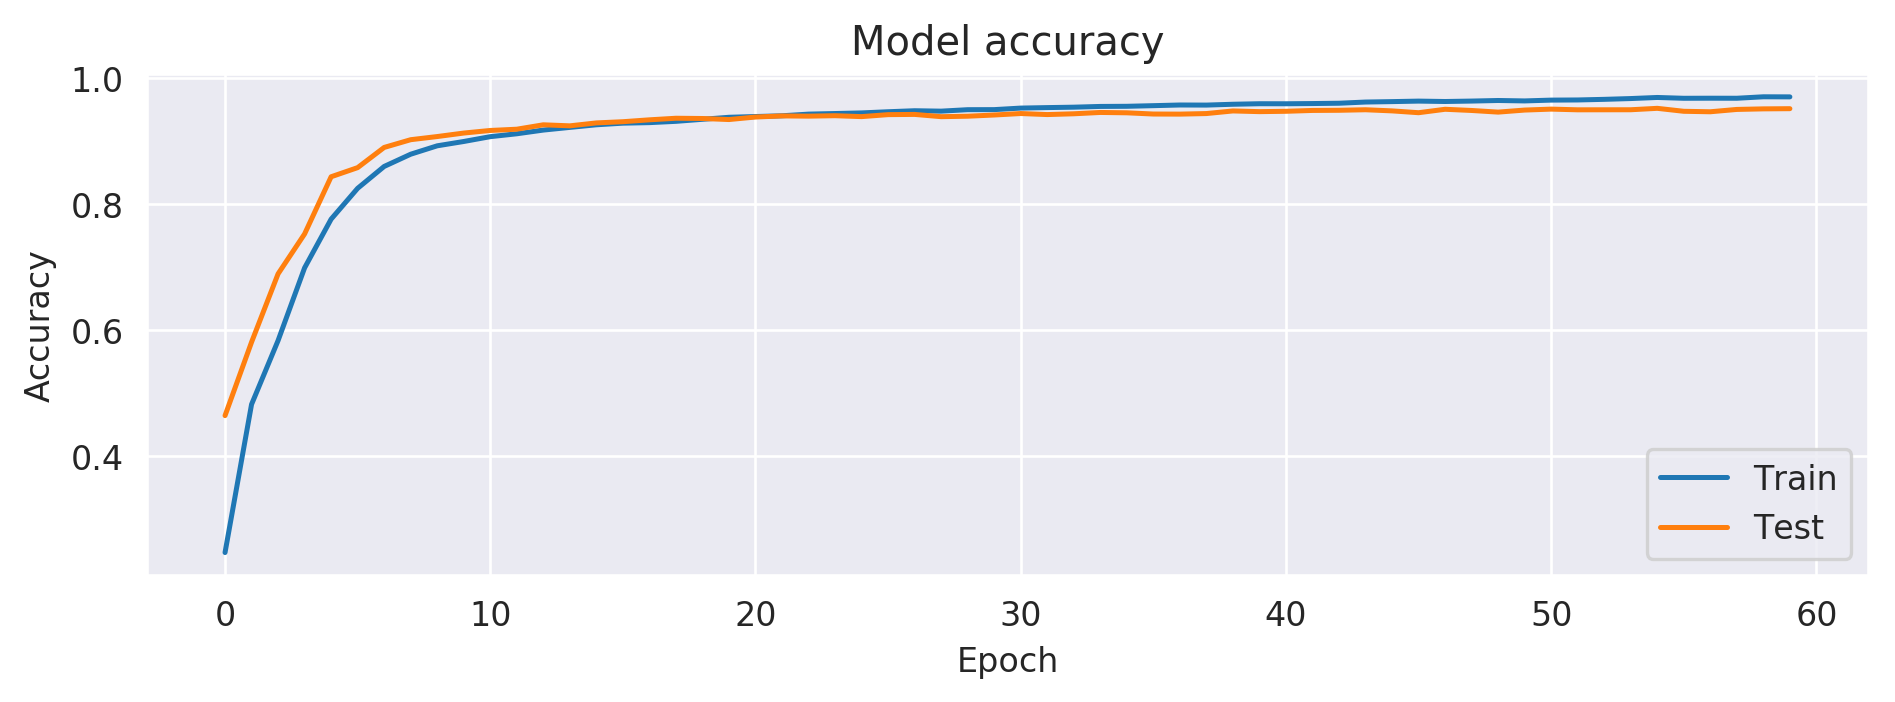

In [17]:
plt.plot(hist_.history['acc'])
plt.plot(hist_.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.gcf().set_size_inches(8, 3)
plt.tight_layout()

In [22]:
X.shape

(70000, 28, 28)

In [39]:
X = X[..., None]

In [40]:
X.shape

(70000, 28, 28, 1)

In [61]:
n = keras.Sequential()
n.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
n.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
n.add(MaxPool2D(pool_size=(2,2)))

n.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
n.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
n.add(MaxPool2D(pool_size=(2,2)))
n.add(Flatten())
n.add(Dense(128, activation='relu'))
n.add(Dropout(0.25))

n.add(Dense(10, activation='softmax'))

n.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [62]:
X[:50000].shape

(50000, 28, 28, 1)

In [63]:
y2 = keras.utils.to_categorical(y, 10)

In [ ]:
np.random.RandomState(23).randint()

In [80]:
def mnist_gen(random_state=32):
    
    rs = np.random.RandomState(random_state)
    
    N = X[:50000].shape[0]

    for i in range(500000):
        ind = rs.randint(0, N, size=500)
        yield (X[:50000])[ind], y2[ind]

In [81]:
X.shape

(70000, 28, 28, 1)

In [82]:
myiter = mnist_gen(52)

In [84]:
hist2_ = n.fit_generator(mnist_gen(42), steps_per_epoch=1, verbose=1, shuffle=True,
                         epochs=60,
                         validation_data=(X[50000:], y2[50000:]))

Epoch 1/60
1/1 [==============================] - 3s 3s/step - loss: 0.0048 - acc: 0.9960 - val_loss: 0.0408 - val_acc: 0.9910
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 0.0163 - acc: 0.9940 - val_loss: 0.0406 - val_acc: 0.9911
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 0.0157 - acc: 0.9980 - val_loss: 0.0401 - val_acc: 0.9912
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 0.0105 - acc: 0.9920 - val_loss: 0.0396 - val_acc: 0.9919
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0396 - val_acc: 0.9918
Epoch 6/60
1/1 [==============================] - 2s 2s/step - loss: 0.0055 - acc: 0.9980 - val_loss: 0.0401 - val_acc: 0.9915
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 0.0058 - acc: 0.9960 - val_loss: 0.0410 - val_acc: 0.9912
Epoch 8/60
1/1 [==============================] - 2s 2s/step - loss: 0.0050 - acc: 0.9980 - val_loss: 0.0425 - 

In [85]:
plt.plot(hist2_.history['acc'])
plt.plot(hist2_.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.gcf().set_size_inches(8, 3)
plt.tight_layout()